# Packages Required

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *

# DataFrame Analysis

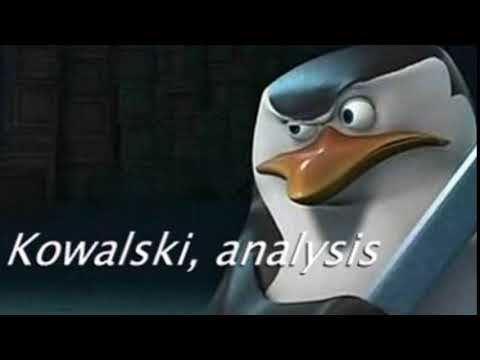

In [2]:
df = pd.read_csv('adult.csv', na_values=['?'])
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


I noticed question marks when viewing the dataset so I decided to change it when reading the CSV file.

# Simplifying Features before PyCaret setup

In [3]:
print("Types of working class :\n", df.workclass.value_counts(), '\n', 'Types in occupation\n', df.occupation.value_counts())

Types of working class :
 Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 
 Types in occupation
 Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


In [4]:
df['marital.status'] = df['marital.status'].replace(['Never-married', 'Divorced', 'Separated', 'Widowed'], 'Single')
#Spouse means Married More simple right
df['marital.status'] = df['marital.status'].replace(['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'], 'Married')
#Now we map it to Binary values
df['marital.status'] = df['marital.status'].map({'Married':1, 'Single':0})

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,0,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,0,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,0,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,0,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,0,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [7]:
df.drop(labels=["education.num", "race", "native.country"], axis = 1, inplace = True)
df.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,sex,capital.gain,capital.loss,hours.per.week,income
0,90,NaN,77053,HS-grad,0,NaN,Not-in-family,Female,0,4356,40,<=50K
1,82,Private,132870,HS-grad,0,Exec-managerial,Not-in-family,Female,0,4356,18,<=50K
2,66,NaN,186061,Some-college,0,NaN,Unmarried,Female,0,4356,40,<=50K
3,54,Private,140359,7th-8th,0,Machine-op-inspct,Unmarried,Female,0,3900,40,<=50K
4,41,Private,264663,Some-college,0,Prof-specialty,Own-child,Female,0,3900,40,<=50K


In [8]:
df.to_csv('adult_trimmed.csv')

# PyCaret Setup

In [9]:
classifier_set = setup(data = df, target = 'income', session_id=33, use_gpu=True)

,Description,Value
0,session_id,33
1,Target,income
2,Target Type,Binary
3,Label Encoded,"<=50K: 0, >50K: 1"
4,Original Data,"(32561, 12)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


# Model Comparison

In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8716,0.9272,0.6512,0.7778,0.7087,0.6271,0.6313,6.1700
lightgbm,Light Gradient Boosting Machine,0.8708,0.9254,0.6506,0.7746,0.7071,0.6250,0.6290,0.3050
gbc,Gradient Boosting Classifier,0.8639,0.9172,0.5814,0.7967,0.6720,0.5888,0.6006,2.7290
ada,Ada Boost Classifier,0.8570,0.9099,0.6144,0.7446,0.6731,0.5826,0.5872,0.9560
rf,Random Forest Classifier,0.8506,0.9022,0.6109,0.7237,0.6623,0.5673,0.5708,2.2330
ridge,Ridge Classifier,0.8381,0.0000,0.4993,0.7417,0.5966,0.5002,0.5156,0.1220
lda,Linear Discriminant Analysis,0.8379,0.8901,0.5514,0.7083,0.6200,0.5190,0.5256,0.4270
et,Extra Trees Classifier,0.8344,0.8779,0.6082,0.6709,0.6378,0.5308,0.5321,3.8710
dt,Decision Tree Classifier,0.8116,0.7482,0.6265,0.6036,0.6146,0.4900,0.4903,0.1450
lr,Logistic Regression,0.8009,0.6070,0.2764,0.7215,0.3959,0.3056,0.3574,0.4800


In [11]:
print(best_model)

# Creating Model

In [12]:
clf = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8785,0.9352,0.6563,0.8013,0.7216,0.6449,0.6501
1,0.8623,0.9168,0.6490,0.7442,0.6934,0.6051,0.6075
2,0.8706,0.9287,0.6630,0.7653,0.7105,0.6277,0.6304
3,0.8741,0.9330,0.6538,0.7846,0.7133,0.6335,0.6378
4,0.8741,0.9360,0.6538,0.7846,0.7133,0.6335,0.6378
5,0.8618,0.9226,0.6502,0.7411,0.6927,0.6040,0.6062
6,0.8657,0.9188,0.6374,0.7632,0.6946,0.6094,0.6135
7,0.8824,0.9294,0.6465,0.8248,0.7248,0.6515,0.6593
8,0.8732,0.9296,0.6472,0.7867,0.7101,0.6300,0.6349
9,0.8732,0.9221,0.6545,0.7817,0.7124,0.6319,0.6360


In [13]:
tuned_clf = tune_model(clf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8785,0.9298,0.6453,0.8096,0.7182,0.6420,0.6487
1,0.8605,0.9119,0.6380,0.7441,0.6870,0.5980,0.6009
2,0.8732,0.9254,0.6648,0.7740,0.7153,0.6343,0.6373
3,0.8745,0.9307,0.6593,0.7826,0.7157,0.6359,0.6398
4,0.8763,0.9377,0.6538,0.7933,0.7169,0.6386,0.6435
5,0.8622,0.9223,0.6429,0.7468,0.6909,0.6029,0.6057
6,0.8583,0.9144,0.6062,0.7540,0.6721,0.5830,0.5887
7,0.8758,0.9249,0.6374,0.8037,0.7109,0.6332,0.6401
8,0.8697,0.9258,0.6490,0.7717,0.7051,0.6222,0.6261
9,0.8675,0.9200,0.6344,0.7728,0.6968,0.6131,0.6179


In [14]:
print(tuned_clf)

# Model Plots

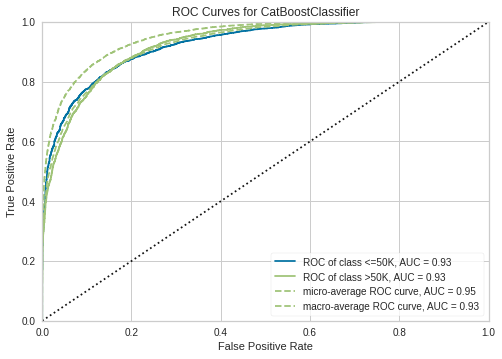

In [15]:
plot_model(tuned_clf, plot = 'auc')

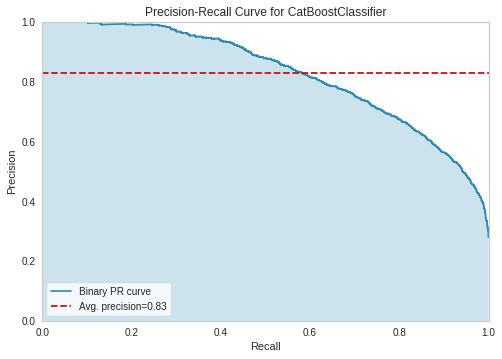

In [16]:
plot_model(tuned_clf, plot = 'pr')

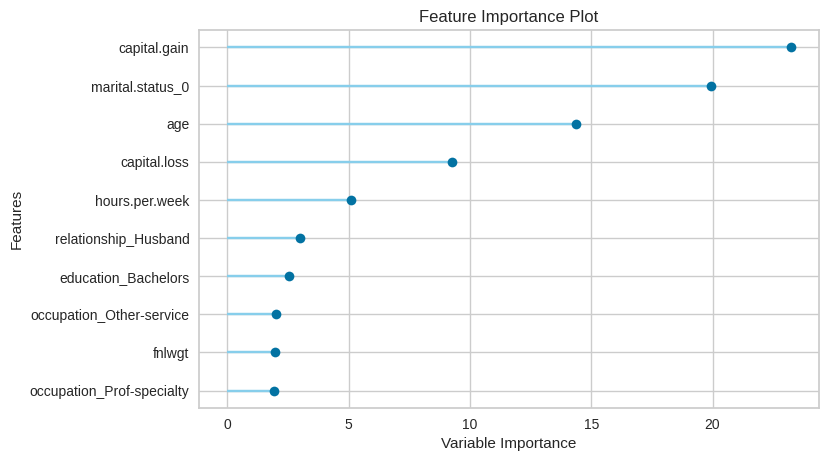

In [17]:
plot_model(tuned_clf, plot='feature')

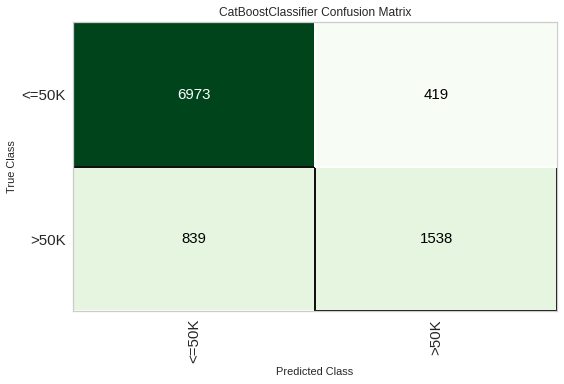

In [18]:
plot_model(tuned_clf, plot = 'confusion_matrix')

In [19]:
predict_model(tuned_clf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8712,0.9268,0.6470,0.7859,0.7097,0.6280,0.6329


,age,fnlwgt,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Female,income,Label,Score
0,33.0,348491.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,>50K,>50K,0.6658
1,69.0,203072.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,>50K,>50K,0.6995
2,52.0,127749.0,0.0,0.0,50.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,<=50K,<=50K,0.5139
3,29.0,105694.0,0.0,0.0,42.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,<=50K,<=50K,0.8667
4,22.0,242912.0,0.0,0.0,35.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,<=50K,<=50K,0.9997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9764,27.0,213921.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,<=50K,<=50K,0.9976
9765,32.0,241802.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,<=50K,<=50K,0.7735
9766,21.0,194861.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,<=50K,<=50K,0.9985
9767,37.0,404661.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,<=50K,<=50K,0.8810


# Finalizing Model

In [20]:
model = finalize_model(tuned_clf)

In [21]:
print(model)

# Save Model

In [22]:
save_model(model, "Income Prediction Model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='income',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='income')),
                 ('fix_perfect', Remove_100(target='income')),
                 ('clean_names', 